In [1]:
! pip install numpy h5py pandas

In [2]:
import os, sys    # for handling paths
import h5py as h5  #for handling data format
import matplotlib.pyplot as plt

Load the data (in h5 format)

In [3]:
Data1  = h5.File('COMPAS_Output.h5')
Data2  = h5.File('COMPAS_Output_2.h5')

Inspect the data

In [4]:
list(Data1.keys())

['BSE_Common_Envelopes',
 'BSE_Double_Compact_Objects',
 'BSE_RLOF',
 'BSE_System_Parameters',
 'Run_Details']

In [5]:
list(Data2.keys())

['Run_Details', 'SSE_Supernovae', 'SSE_System_Parameters']

In [31]:
CE1 = Data1['BSE_Common_Envelopes']
list(CE1.keys())
merger = CE1['Merger'][()]
print(merger.shape)                   # number of systems in this file
print(merger[:5])                    # the values of the first 3 entries

(19898,)
[1 1 1 1 0]


In [6]:
SP1 = Data1['BSE_System_Parameters']
SP2 = Data2['SSE_System_Parameters']

In [7]:
list(SP1.keys())

['ID',
 'Luminosity(1)',
 'Luminosity(2)',
 'Mass@ZAMS(1)',
 'Mass@ZAMS(2)',
 'Record_Type',
 'SEED',
 'Teff(1)',
 'Teff(2)']

In [8]:
# It is a pain to write the entire group each time so we define shorthands
list(SP2.keys())

['Ang_Momentum',
 'CH_on_MS',
 'Evolution_Status',
 'Luminosity',
 'Mass',
 'Mass@ZAMS',
 'Mass_Env',
 'Metallicity@ZAMS',
 'Omega@ZAMS',
 'PO_LBV_Factor',
 'PO_Sigma_Kick_CCSN_BH',
 'PO_Sigma_Kick_CCSN_NS',
 'PO_Sigma_Kick_ECSN',
 'PO_Sigma_Kick_USSN',
 'PO_WR_Factor',
 'Radius@ZAMS',
 'Record_Type',
 'SEED',
 'SN_Kick_Magnitude_Random_Number',
 'Stellar_Type',
 'Stellar_Type@ZAMS',
 'Teff']

Finding the unit of a parameter

In [10]:
print(SP1['Teff(1)'].attrs['units']) # attrs refers to attributes

b'K'


In [11]:
print(SP1['Luminosity(1)'].attrs['units'])

b'Lsol'


In [12]:
L1 = SP1['Luminosity(1)'][()]
print(L1.shape)                   # number of systems in this file
print(L1[:5])                    # the values of the first 3 entries

(1000,)
[2.10932336e+05 1.38452913e-10 1.99863778e+04 2.72636540e-05
 4.28336626e+02]


In [13]:
T1 = SP1['Teff(1)'][()]
print(T1.shape)                   # number of systems in this file
print(T1[:5])                    # the values of the first 3 entries

(1000,)
[119654.0824061    5227.74100726  18411.49503705 110124.65340296
  57445.25704737]


In [15]:
L2 = SP1['Luminosity(2)'][()]
T2 = SP1['Teff(2)'][()]

In [17]:
Lss = SP2['Luminosity'][()]
print(Lss.shape)                   # number of systems in this file
print(Lss[:5])                    # the values of the first 3 entries
Tss = SP2['Teff'][()]
print(Tss.shape)                   # number of systems in this file
print(Tss[:5])                    # the values of the first 3 entries

(1000,)
[2.27069894e+00 7.33504702e+01 7.62036634e+05 2.39105296e+00
 3.08871036e+05]
(1000,)
[  3635.50812386 206541.20910819   3679.9961829    3469.97714892
   3704.79652713]


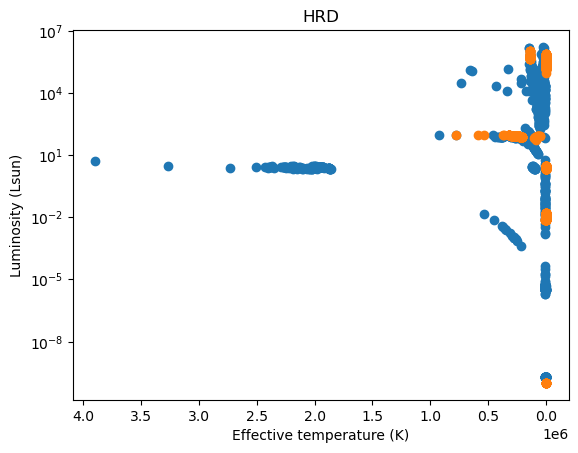

In [29]:
plt.scatter(T1+T2, L1+L2)
plt.scatter(Tss, Lss)
plt.gca().invert_xaxis()
plt.title('HRD')
plt.xlabel('Effective temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.yscale('log')